<a href="https://colab.research.google.com/github/darshil8008/ML-Algorithms-Implementation/blob/main/Linear_Regression_on_Fuel_Consumption_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Loading dataset

data = pd.read_csv(r'C:\Users\hp\Downloads\FuelConsumption.csv')

In [ ]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
data.shape

(1067, 13)

In [ ]:
data.corr()         # Correlation coefficients

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


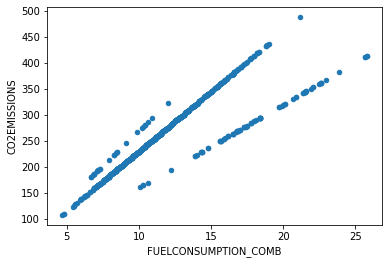

In [ ]:
data.plot(kind='scatter', x= 'FUELCONSUMPTION_COMB', y= 'CO2EMISSIONS')
plt.show()

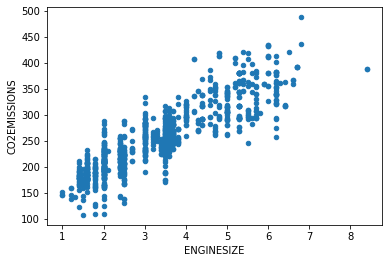

In [ ]:
data.plot(kind='scatter', x= 'ENGINESIZE', y= 'CO2EMISSIONS')
plt.show()

In [ ]:
# Change to dataframe variables

fc = pd.DataFrame(data['FUELCONSUMPTION_COMB'])
em = pd.DataFrame(data['CO2EMISSIONS'])

In [ ]:
# Building a Linear Regression Model

lm = linear_model.LinearRegression()
model = lm.fit(fc, em)

In [ ]:
model.coef_

array([[16.21997027]])

In [ ]:
model.intercept_

array([68.38713348])

In [ ]:
model.score(fc, em)      # Evaluate the model

0.7958934270115507

In [ ]:
# Predict new value of fuel-consumption (fc)

fc_new = 15
em_predict = model.predict(fc_new)
em_predict


array([[311.68668746]])

In [ ]:
# Predict more values

X = ([16,18,20])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis=1, keys=['fc_new', 'em_predicted'])
df

,fc_new,em_predicted
,0,0
0,16,327.906658
1,18,360.346598
2,20,392.786539


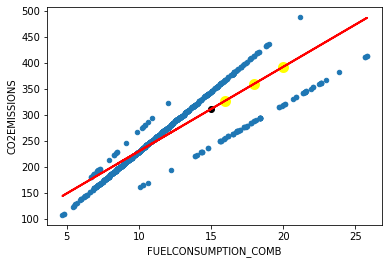

In [ ]:
# Visualizing the result
data.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')

# Plotting the regression line
plt.plot(fc, model.predict(fc), color='red', linewidth=2)

# Plotting the predicted value
plt.scatter(fc_new, em_predict, color='black')
plt.scatter(X, Y, color='yellow', linewidth=5)
plt.show()